In [1]:
from datasets import load_dataset

ds = load_dataset("mstz/heloc")

c:\Users\caioc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo o dataset para DataFrame
df = pd.DataFrame(ds['train'])

In [3]:
# Visão geral dos dados
print("Informações gerais do dataset:")
print("-" * 50)
print(f"Número total de registros: {len(df)}")
print(f"Número de features: {len(df.columns)}")
print("\nTipos de dados:")
print(df.dtypes)

# Análise de dados ausentes
print("\nDados ausentes por coluna:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

Informações gerais do dataset:
--------------------------------------------------
Número total de registros: 10459
Número de features: 24

Tipos de dados:
estimate_of_risk                            int64
months_since_first_trade                    int64
months_since_last_trade                     int64
average_duration_of_resolution              int64
number_of_satisfactory_trades               int64
nr_trades_insolvent_for_over_60_days        int64
nr_trades_insolvent_for_over_90_days        int64
percentage_of_legal_trades                  int64
months_since_last_illegal_trade             int64
maximum_illegal_trades_over_last_year       int64
maximum_illegal_trades                      int64
nr_total_trades                             int64
nr_trades_initiated_in_last_year            int64
percentage_of_installment_trades            int64
months_since_last_inquiry_not_recent        int64
nr_inquiries_in_last_6_months               int64
nr_inquiries_in_last_6_months_not_recent    i

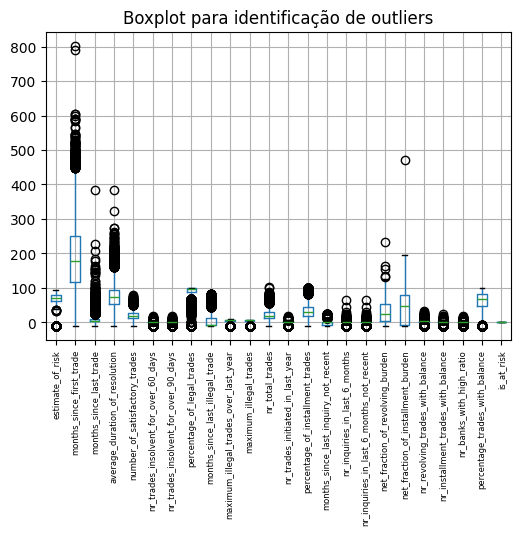

In [4]:
# Identificação de outliers usando boxplots
plt.figure(figsize=(6, 4))
df.boxplot()
plt.xticks(rotation=90, fontsize=6)  # Diminuindo a fonte dos atributos
plt.title('Boxplot para identificação de outliers')
plt.show()

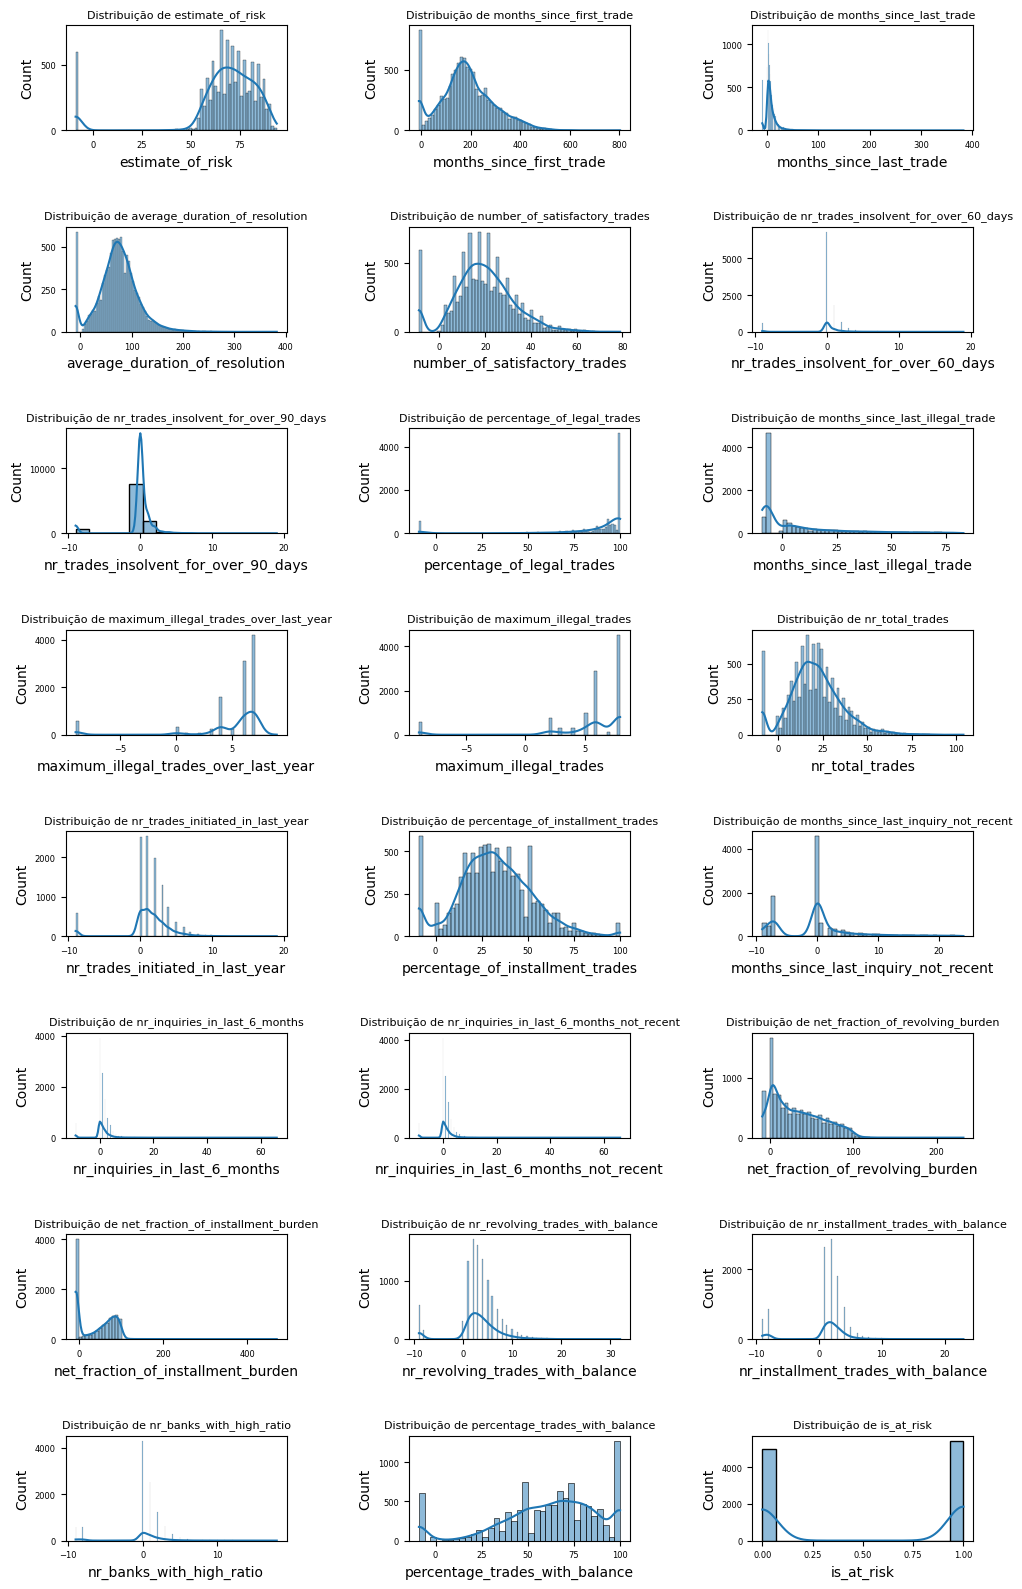

In [5]:
# Análise de distribuição das variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(10, 2*n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}', fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
plt.tight_layout(h_pad=3, w_pad=5)
plt.show()

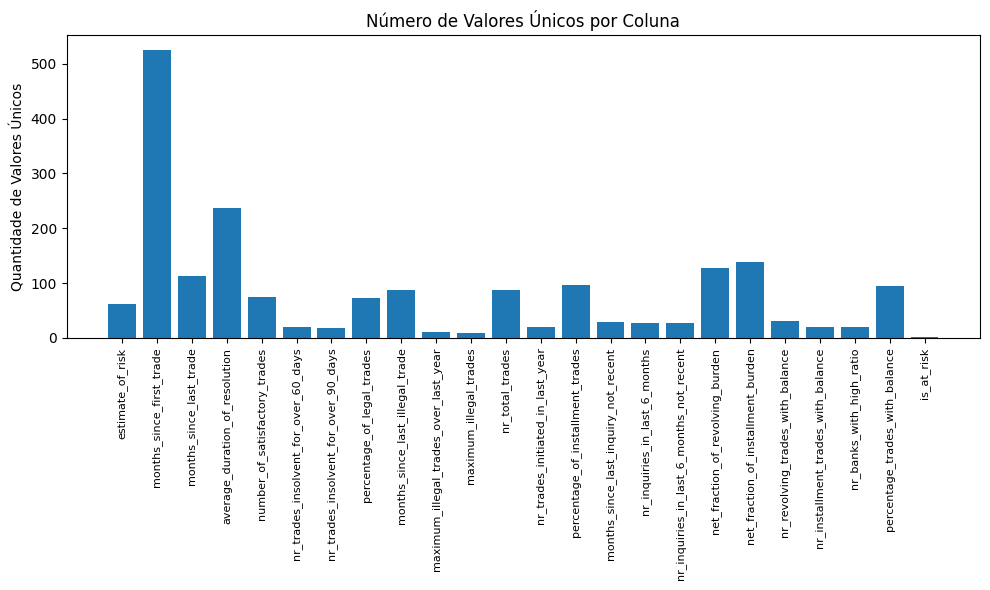

In [6]:
# Verificação de inconsistências
plt.figure(figsize=(10, 6))
unique_values = [df[col].nunique() for col in df.columns]
plt.bar(df.columns, unique_values)
plt.xticks(rotation=90, fontsize=8)  # Diminuindo a fonte dos nomes das características
plt.title('Número de Valores Únicos por Coluna')
plt.ylabel('Quantidade de Valores Únicos')
plt.tight_layout()
plt.show()